In [1]:
import pickle as cPickle
import gzip, numpy
# Load the dataset
f = gzip.open('mnist.pkl.gz', 'rb')
train_set, valid_set, test_set = cPickle.load(f, encoding='iso-8859-1')
f.close()

In [2]:
#above I used the given code block modified for python3
#below I import my libraries
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#these variables keep track of the errors for plotting later
trainErr, validErr, testErr = [],[],[]
#these objects contain the parameters' values for each sample in the sets from our data
Xtrn, Xvld, Xtst = train_set[0], valid_set[0], test_set[0]
#these objects contain the targets' values for each sample in the sets from our data
Ytrn, Yvld, Ytst = train_set[1], valid_set[1], test_set[1]
#Neural Network imported from sklearn
NeuralNetwork = MLPClassifier(alpha=0.00001, random_state=1, learning_rate='adaptive')

In [4]:
#epoch variable acts as a counter for the while loop
#each iteration it increments until it reaches the set maximum
epoch = 0
while(epoch < 100):
    epoch += 1
    #fits the neural network for the epoch
    NeuralNetwork.partial_fit(Xtrn,Ytrn,classes=np.unique(Ytrn))
    #adds the losses at this epoch to the lists
    trainErr.append(1-NeuralNetwork.score(Xtrn,Ytrn))
    validErr.append(1-NeuralNetwork.score(Xvld,Yvld))
    testErr.append(1-NeuralNetwork.score(Xtst,Ytst))
    
    #prints every 5 epochs
    if(epoch%5 == 0):
        print(epoch)
    
    #early stopping to prevent overfitting when when validation score is 99% or higher
    if (validErr[-1] <= 0.01):
        break
    #early stopping to prevent overfitting when when validation score is not improving for 10 consecutive epochs
    if (epoch >= 5):
        for i in range(1,6):
            if min(validErr[epoch-i:]) != validErr[epoch-i]:
                break
            elif(i==5):
                epoch=101

5
10
15
20
25
30
35
40
45
50
55
60
65


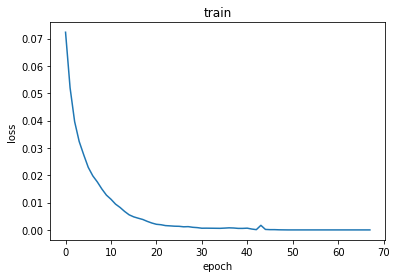

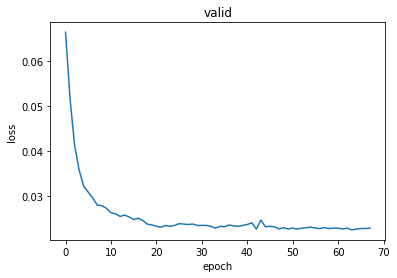

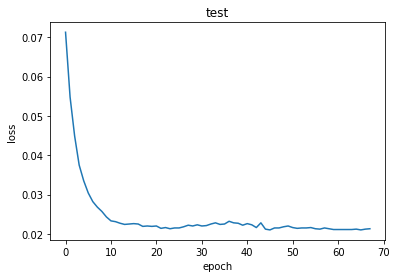

In [5]:
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('train')
plt.plot(trainErr)
plt.show()
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('valid')
plt.plot(validErr)
plt.show()
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('test')
plt.plot(testErr)
plt.show()

In [6]:
print(1-min(validErr))
print(1-min(testErr))

0.9776
0.979
